In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
  "font.size": 14
})

In [24]:
path = "../data/D_radiodurans/"
files = ["battista_1997", "chen_2004", "daly_2004", "ferriera_1997", "minton_1994", "omelchenko_2005", "richmond_1999"]
names = ["Battista 1997", "Chen et al. (2004)", "Daly et al. (2004)", "Ferriera et al. (1997)", "Minton (1994)", "Omelchenko et al. (2005)", "Richmond et al. (1999)"]

survival_curves = []

for i in range(len(files)):
    survival_curves.append(np.genfromtxt(path + files[i] +".csv", delimiter=",", skip_header=1))
    

In [25]:
all_data = np.vstack(survival_curves)
def decay_with_shoulder(x, a, b):
    result = x.copy()
    result[x < a] = 0
    result[x>= a] = -b*(x[x>= a]-a)
    return result
As = []
Bs = []
for i in range(len(files)):
    [a,b], corr = curve_fit(decay_with_shoulder, survival_curves[i][:,0], survival_curves[i][:,1])
    As.append(a)
    Bs.append(b)

a = np.mean(As)
b = np.mean(Bs)
x = np.linspace(0, all_data[:,0].max(), 1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


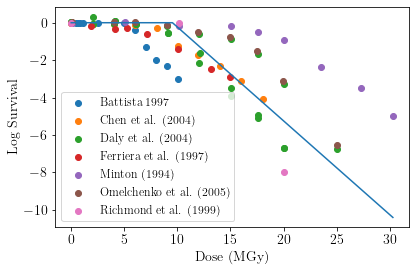

In [26]:
for i in range(len(files)):
    plt.scatter(survival_curves[i][:,0], survival_curves[i][:,1], label = names[i])
plt.legend(prop = {"size": 12})
plt.plot(x, decay_with_shoulder(x, a, b))
plt.xlabel("Dose (MGy)")
plt.ylabel("Log Survival")
plt.tight_layout()
plt.savefig("../figures/survival.eps")

In [27]:
print(a, b)

9.53961015837598 0.5014607872722542


No handles with labels found to put in legend.


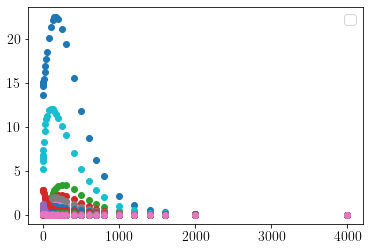

In [28]:
arr = np.genfromtxt("../HZETRN2020/2_Transport/results_output/dose.dat", skip_header=7)
for i in range(3, arr.shape[1]):
    plt.scatter(arr[:,0], arr[:,i]*365.25)
plt.legend()
# plt.yscale("log")
# plt.xscale("log")

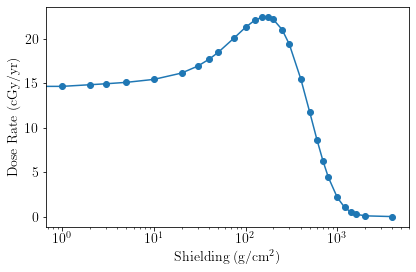

In [29]:
plt.plot(arr[:,0], arr[:,3]*365.25, "-o")
plt.xscale("log")
plt.xlabel("Shielding (g/cm$^2$)")
plt.ylabel("Dose Rate (cGy/yr)")
plt.tight_layout()
plt.savefig("../figures/dose_rate.eps")

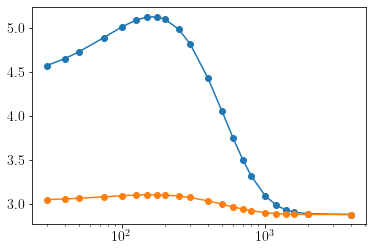

In [35]:
NATURAL_RADIOACTIVITY = 2.88
shielding = arr[:,0].copy()
dose_10 = arr[:,3].copy() * 365.25
dose_10[shielding<30] = np.infty
dose_10 /= 10
dose_10 += NATURAL_RADIOACTIVITY
dose_100 = arr[:,3].copy() * 365.25
dose_100[shielding<30] = np.infty
dose_100 /= 100
dose_100 += NATURAL_RADIOACTIVITY

plt.plot(shielding, dose_10, "-o")
plt.plot(shielding, dose_100, "-o")
plt.xscale("log")

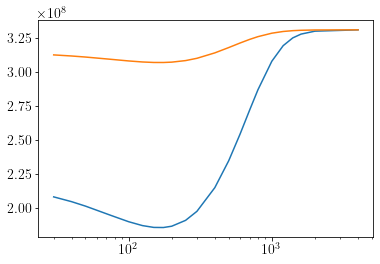

In [41]:
time_until_decay_10 = a*1e6/(dose_10/100)
time_until_decay_100 = a*1e6/(dose_100/100)

plt.plot(shielding[time_until_decay_10>0], time_until_decay_10[time_until_decay_10>0])
plt.plot(shielding[time_until_decay_10>0], time_until_decay_100[time_until_decay_10>0])
plt.xscale("log")

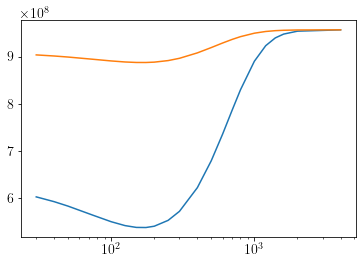

In [58]:
time_until_m6_10 = 6* np.log(10) / (b*1e-6 * dose_10*1e-2)
time_until_m6_100 = 6* np.log(10) / (b*1e-6 * dose_100*1e-2)

plt.plot(shielding[time_until_decay_10>0], time_until_m6_10[time_until_decay_10>0])
plt.plot(shielding[time_until_decay_10>0], time_until_m6_100[time_until_decay_10>0])
plt.xscale("log")
# plt.yscale("log")

In [59]:
out = np.zeros((shielding.shape[0], 7))
out[:,0] = shielding
out[:,1] = dose_10
out[:,2] = time_until_decay_10 /1e6
out[:,3] = time_until_m6_10 /1e6
out[:,4] = dose_100
out[:,5] = time_until_decay_100/1e6
out[:,6] = time_until_m6_100 /1e6

np.savetxt("../figures/radiation.csv",out, fmt="%.2f", delimiter=",")